In [133]:
import os
import pickle as pkl
from pathlib import Path
from typing import Literal
from pprint import pprint
import matplotlib.pyplot as plt
import json
import matplotlib.colors as mcolors
from enum import Enum

In [134]:
pkl_dir = Path('pkls')

In [135]:
def plot_graph(file, properties:list[str], num_steps:int = 5_000_000):
    def remove_nones(input_list):
        return [x for x in input_list if x is not None]


    # unpickle the file
    with open(file, 'rb') as f:
        data = pkl.load(f)


    data_points = [data[property][:num_steps] for property in properties]
    data_points = [remove_nones(data_point) for data_point in data_points]


    colors = list(mcolors.TABLEAU_COLORS.values())

    for i, data_point in enumerate(data_points):
        x = [num_steps // len(data_point) * i for i in range(len(data_point))]

        plt.plot(x, data_point, color=colors[i % len(colors)]) 
        plt.xlabel('Steps')
        plt.ylabel(properties[i])
        plt.grid(which='major', axis="y")
        plt.legend()
        plt.show()


In [136]:
def plot_4_5_graph(sac_models:list[str],td3_models:list[str], properties:list[str], constraints:list[str],threshold:list[float], num_steps:int = 3_000_000):
    """
    Plot the graphs of the properties of the models in the sac_models and td3_models list

    First property must be the "eval_sampled_constraint_1" property, 
    Second property must be the "eval_return_greedy"
    """

    def remove_nones(input_list):
        return [x for x in input_list if x is not None]

    colors = list(mcolors.TABLEAU_COLORS.values())

    # make a 4 * 5 subplot with 4 rows and 5 columns 
    fig, axes = plt.subplots(4, 5, figsize=(28,17))
    fig.suptitle("SAC vs TD3 Single Constraint", fontsize = 20)

    
    num_models = len(sac_models)

    assert num_models == len(td3_models), "Number of models in SAC and TD3 should be the same"

    for i in range(num_models):

        with open(sac_models[i], 'rb') as f:
            sac_data = pkl.load(f)
            sac_data_points = [sac_data[property][:num_steps] for property in properties]
            sac_data_points = [remove_nones(data_point) for data_point in sac_data_points]
        
        with open(td3_models[i], 'rb') as f:
            td3_data = pkl.load(f)
            td3_data_points = [td3_data[property][:num_steps] for property in properties]
            td3_data_points = [remove_nones(data_point) for data_point in td3_data_points]
        
        # print constraint name at the top of column
        # for j in range(5):
        fig.text(0.17*(i)+0.12, 0.9, constraints[i], fontsize = 14)

        assert len(sac_data_points) == len(td3_data_points), "Number of properties should be the same"
        assert len(sac_data_points[0]) == len(td3_data_points[1]), "Number of points should be the same"

        x_axis = [num_steps // len(sac_data_points[0]) * i for i in range(len(sac_data_points[0]))]

        # add first subplot
        ax = axes[0, i]
        ax.plot(x_axis, sac_data_points[0], color=colors[i+2], label="SAC")
        
        # set x and y labels
        ax.set_xlabel('Steps')
        ax.set_ylabel("Behavior Rate(SAC)")
        ax.axhline(threshold[i], linestyle='--', color = "black", alpha = 0.5, linewidth = 4)
        ax.grid(True, color='grey', linewidth=0.5)


        # add second subplot
        ax = axes[1, i]
        ax.plot(x_axis, td3_data_points[0], color=colors[2+i], label="TD3")
        ax.set_xlabel('Steps')
        ax.set_ylabel("Behavior Rate(TD3)")
        ax.axhline(threshold[i], linestyle='--', color = "black", alpha = 0.5, linewidth = 4)
        ax.grid(True, color='grey', linewidth=0.5)



        # add third subplot
        ax = axes[2, i]
        ax.plot(x_axis, sac_data_points[1], color=colors[0], label="SAC")
        ax.set_xlabel('Steps')
        ax.set_ylabel("Return(SAC)")
        ax.grid(True, color='grey', linewidth=0.5)


        # add fourth subplot
        ax = axes[3, i]
        ax.plot(x_axis, td3_data_points[1], color=colors[1], label="TD3")
        ax.set_xlabel('Steps')
        ax.set_ylabel("Return(TD3)")
        ax.grid(True, color='grey', linewidth=0.5)

    
    plt.show()


In [137]:
def plot_7_3(models:list[str], properties:list[str], constraints:list[str], model_methods:list[str], threshold:list[float], num_steps:int = 5_000_000):
    def remove_nones(input_list):
            return [x for x in input_list if x is not None]

    colors = list(mcolors.TABLEAU_COLORS.values())

        # make a 4 * 5 subplot with 4 rows and 5 columns 
    fig, axes = plt.subplots(3, 7, figsize=(50,20))
    # fig.suptitle("SAC", fontsize = 40)
    for jj in range(7):     
        fig.text(0.15+0.11*jj, 0.9, constraints[jj], fontsize = 24)


    for i in range(len(models)):



        with open(models[i], 'rb') as f:
            data = pkl.load(f)
            data_points = [data.get(property, [])[:num_steps] for property in properties]
            data_points = [remove_nones(data_point) for data_point in data_points]

        # print text at the start of row
        fig.text(0.1, 0.7 - 0.22*i, model_methods[i], fontsize = 20)

        x_axis = [num_steps // len(data_points[0]) * i for i in range(len(data_points[0]))]

        # populate rows
        for j in range(len(properties)):
            ax = axes[i, j]
            ax.plot(data_points[j], color=colors[j])
            if j!=len(properties)-1:
                ax.axhline(threshold[j], linestyle='--', color = "black", alpha = 0.5, linewidth = 4)
            ax.set_xlabel('Steps')
            ax.set_ylabel(properties[j])
            ax.grid(which='major', axis="both")
    
    plt.show()
            



In [138]:
# print all folders in the directory using pathlib
models = [folder for folder in pkl_dir.iterdir()]

models.sort()

# merge os paths
models = [str(i / "train_recorder.pkl") for i in models]

models

['pkls\\SAC_10M_AllContraints_D_Part\\train_recorder.pkl',
 'pkls\\SAC_3M_singleConstraintEnergy\\train_recorder.pkl',
 'pkls\\SAC_3M_singleConstraintGround\\train_recorder.pkl',
 'pkls\\SAC_3M_singleConstraintLava\\train_recorder.pkl',
 'pkls\\SAC_3M_singleConstraintMarker\\train_recorder.pkl',
 'pkls\\SAC_3M_singleConstraintSpeed\\train_recorder.pkl',
 'pkls\\SAC_5M_allConstraints_No_b\\train_recorder.pkl',
 'pkls\\SAC_5M_allConstraints_No_b_No_s\\train_recorder.pkl',
 'pkls\\TD3_10M_AllConstraints_D_Part\\train_recorder.pkl',
 'pkls\\TD3_3M_singleConstraintEnergy\\train_recorder.pkl',
 'pkls\\TD3_3M_singleConstraintGround\\train_recorder.pkl',
 'pkls\\TD3_3M_singleConstraintLava\\train_recorder.pkl',
 'pkls\\TD3_3M_singleConstraintMarker\\train_recorder.pkl',
 'pkls\\TD3_3M_singleConstraintSpeed\\train_recorder.pkl',
 'pkls\\TD3_5M_allConstraints_No_b\\train_recorder.pkl',
 'pkls\\TD3_5M_allConstraints_No_b_No_s\\train_recorder.pkl']

In [139]:
sac_models = models[1:6]
td3_models = models[9:14]
Constraints = ["under Energy Limit","Not on Ground", "in Lava", "Not looking at marker", "above Speed Limit"]
properties = ["eval_greedy_constraint_1","eval_return_greedy"]
thresholds = [0.01, 0.4, 0.01,0.1,0.01]


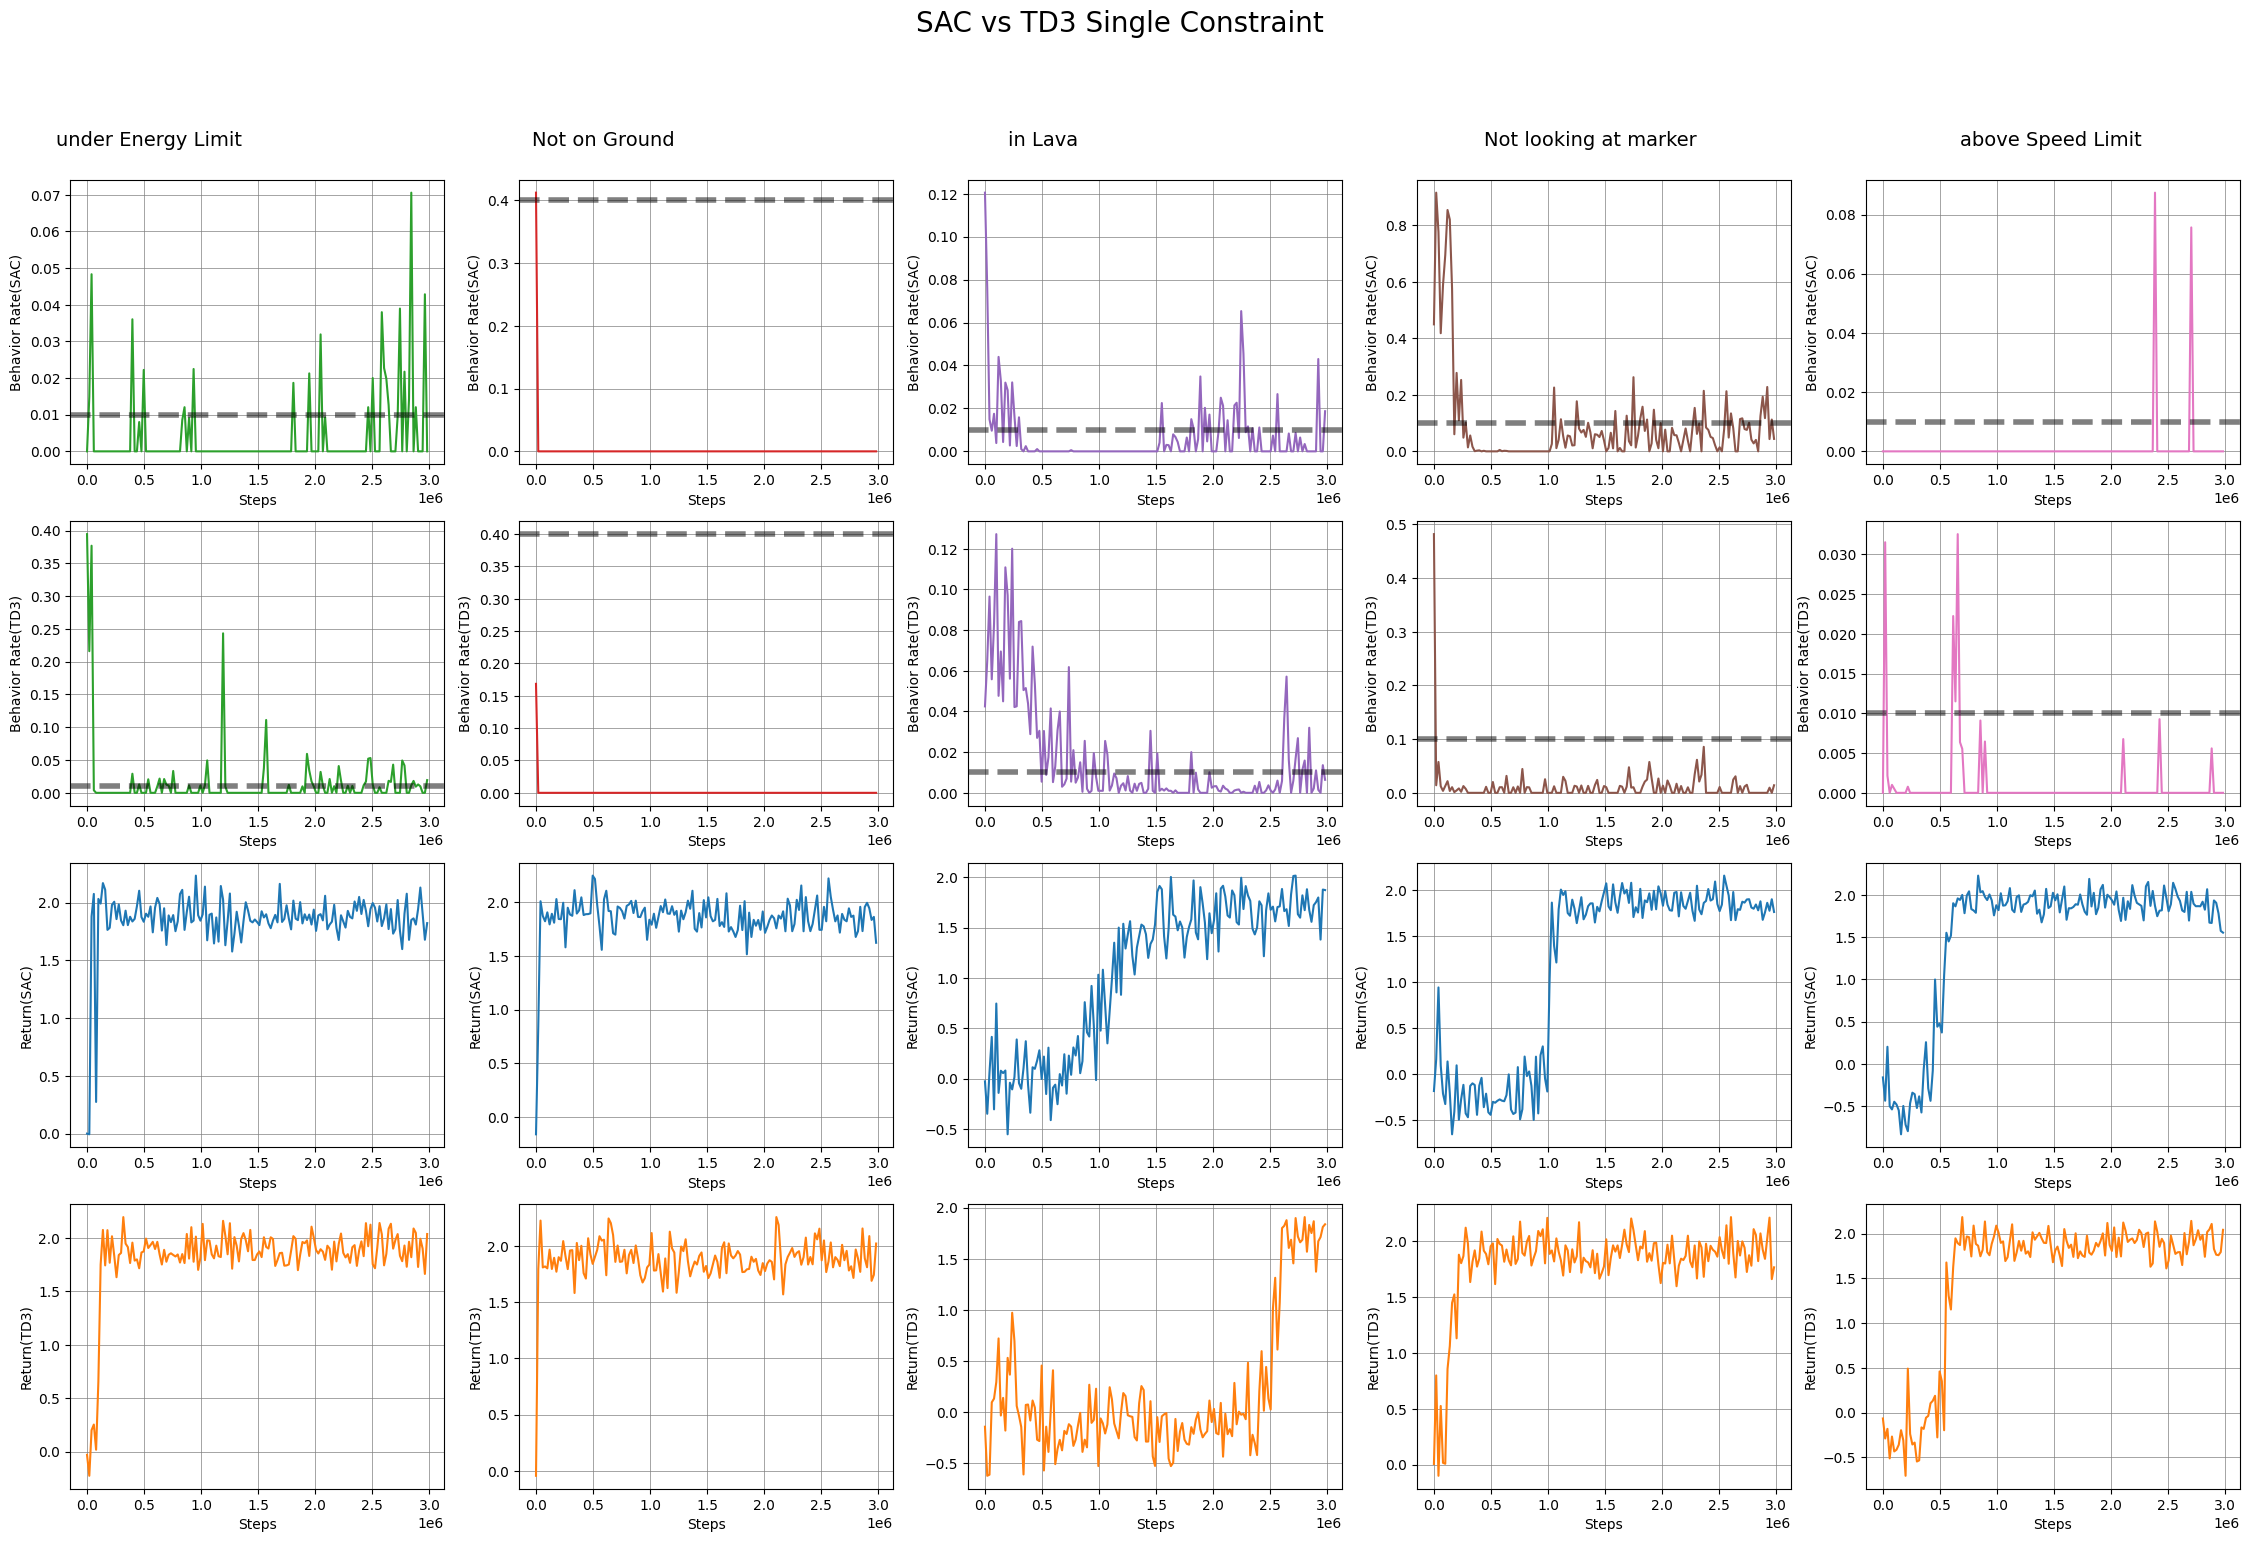

In [140]:
plot_4_5_graph(sac_models, td3_models, properties, Constraints,thresholds)

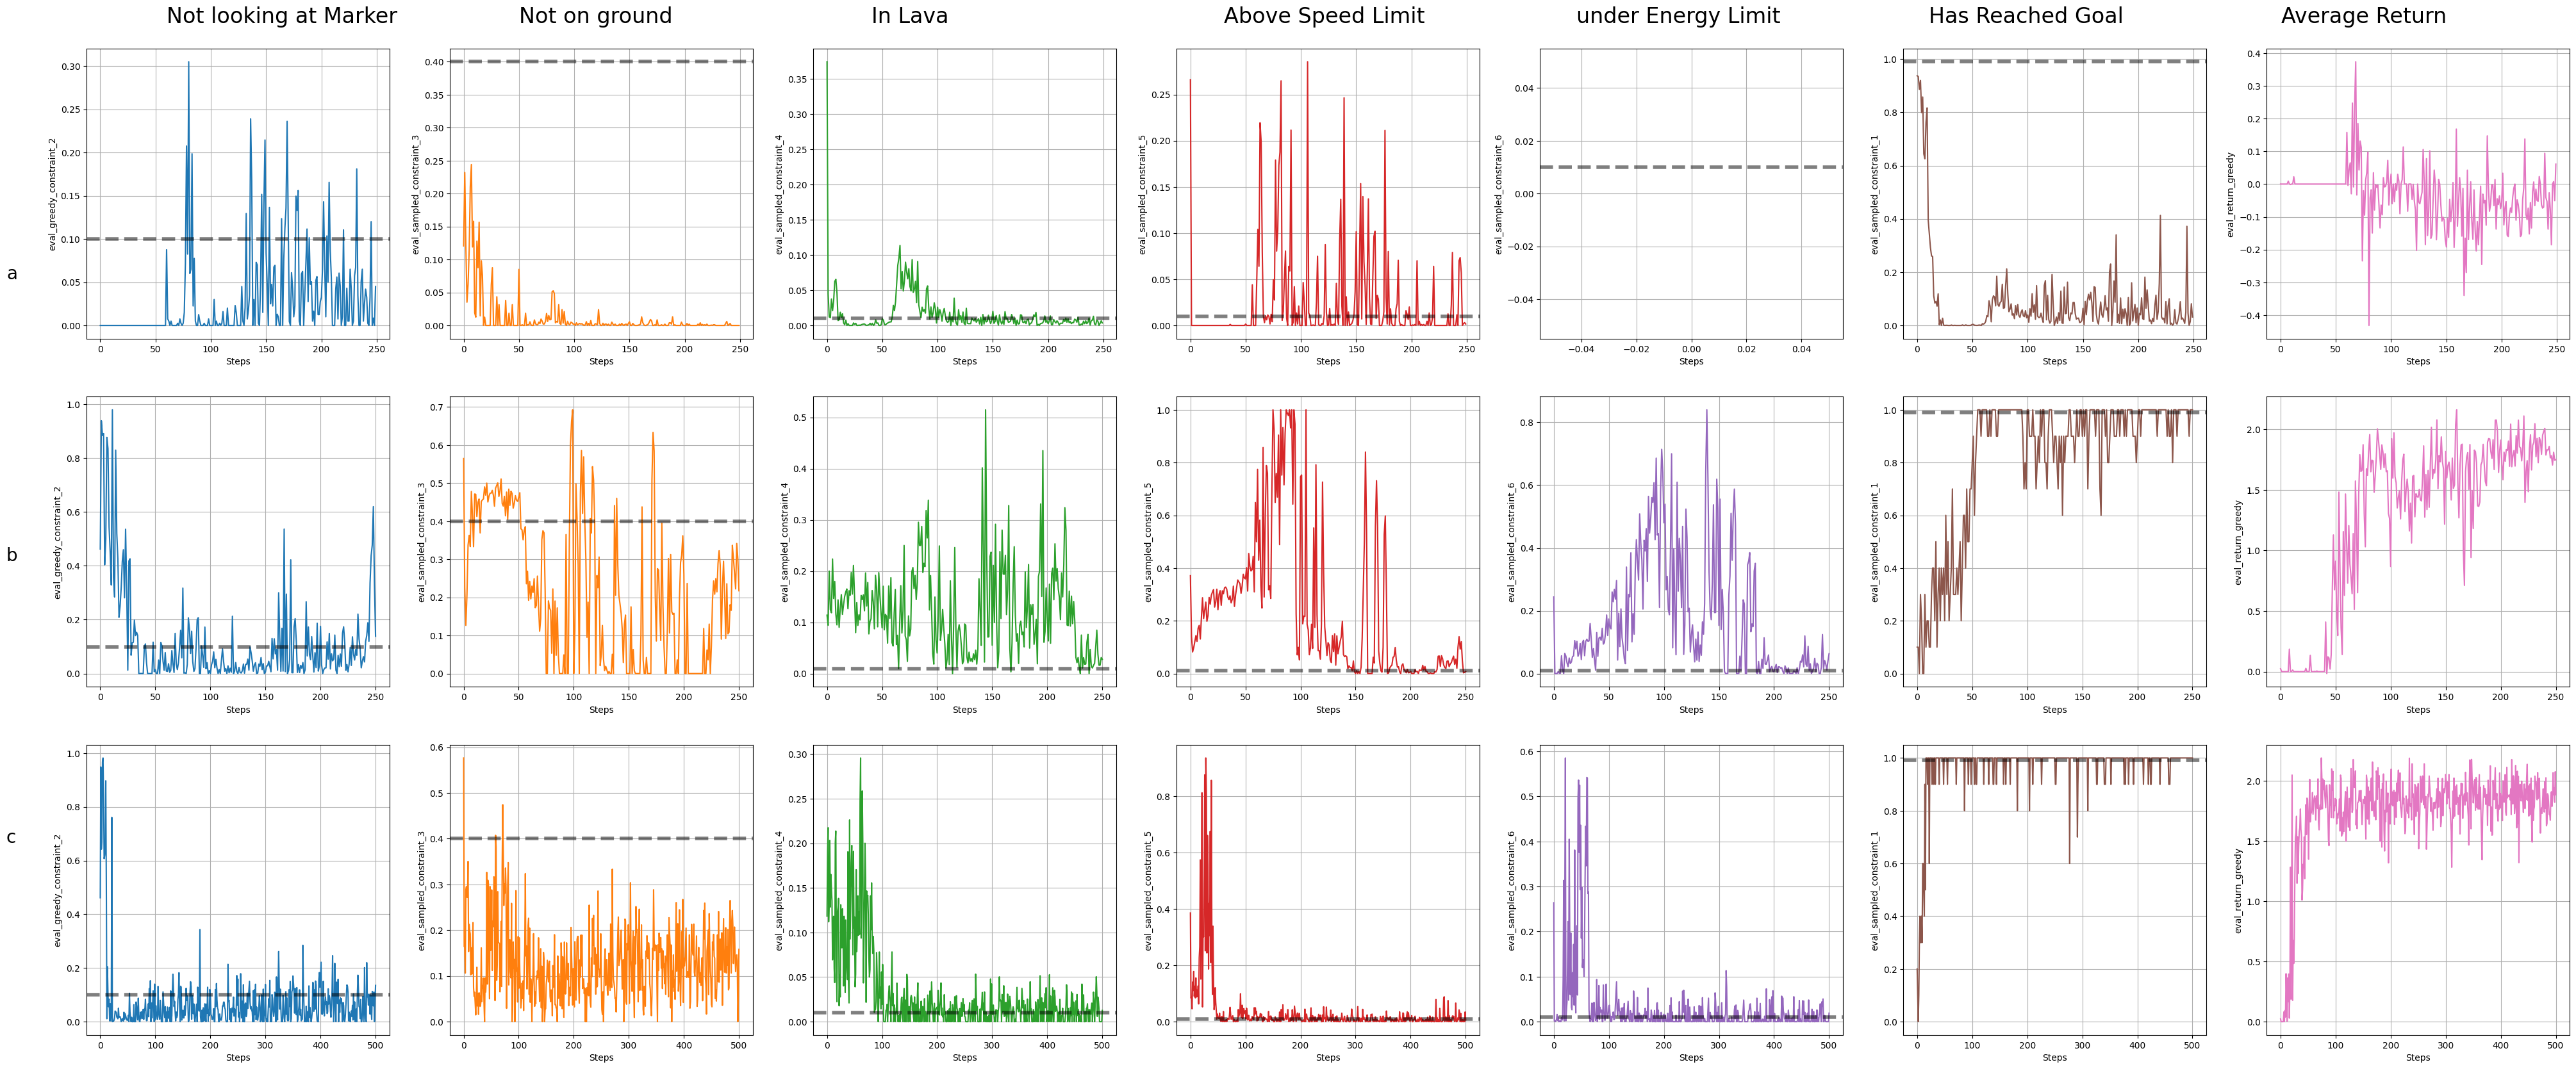

In [141]:
sac_models_all = [models[7], models[6], models[0]]
td3_models_all = [models[15], models[14], models[8]]
# model_methods = ["Lagrangian with the 5 behavioral constraints enforced", "Success constraint", "Success constraint as a bootstrap constraint"]
model_methods = ["a","b","c"]
properties = ["eval_greedy_constraint_2", "eval_sampled_constraint_3","eval_sampled_constraint_4","eval_sampled_constraint_5","eval_sampled_constraint_6","eval_sampled_constraint_1", "eval_return_greedy"]
constraints = ["Not looking at Marker", "Not on ground", "In Lava", "Above Speed Limit", "under Energy Limit", "Has Reached Goal", "Average Return"]
thresholds = [0.1, 0.4, 0.01, 0.01, 0.01, 0.99,10]

plot_7_3(sac_models_all, properties, constraints, model_methods, thresholds)

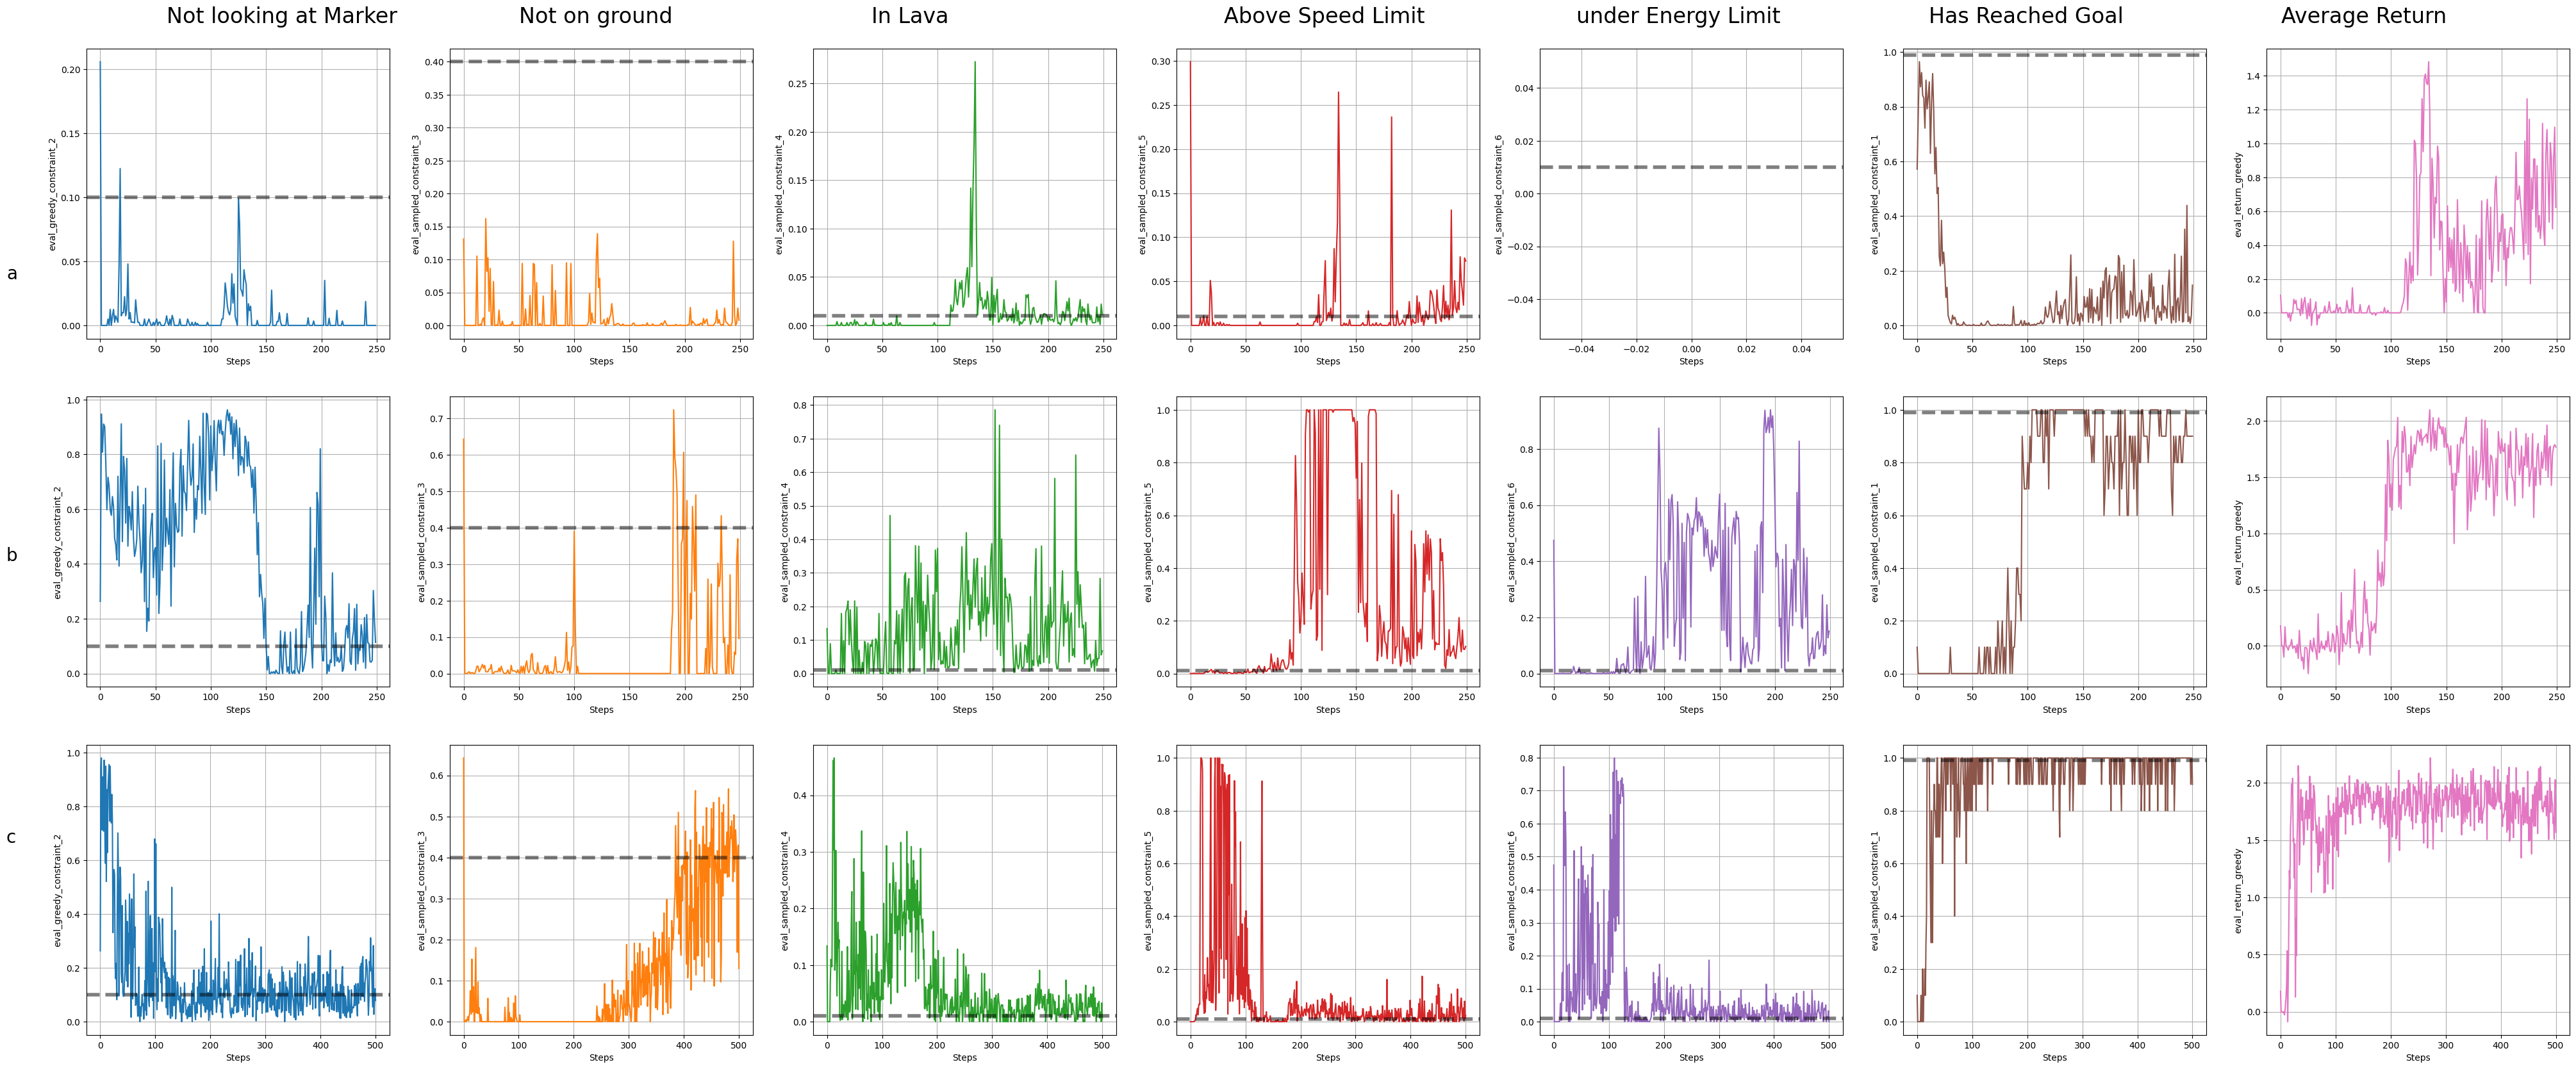

In [142]:
plot_7_3(td3_models_all, properties, constraints, model_methods, thresholds)
